## This notebook shows how the graphs in the paper's main text figures are generated from the calculated error curves

In [34]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

def error_curve_plotter(benchmark_name, n_samples=50, samples_per_it=1, initial_points = 10, dpi=150):
    n_samples += 1

    acc_threshold = 0.05

    with open(f"synthetic_error_rate_data/gp/{benchmark_name}.pkl", "rb") as file:
        error_dictionary = pickle.load(file)


    label = ["Vanilla", "Single Source\nPhaseTransfer", "Multi Source\nPhaseTransfer"]
    color = ["r", "b", "green", "aqua"]
    for i, name in enumerate(error_dictionary.keys()):
        if(name=="tl_highest"):
            continue
        error_data = np.array(error_dictionary[name])
        points = (np.arange(error_data.shape[1])*samples_per_it+ int(initial_points))

        error_mean = np.mean(error_data, axis = 0)
        error_std = np.std(error_data, axis = 0)
        error_lower = error_mean - error_std
        error_upper = error_mean + error_std

        plt.plot(points[:n_samples], error_mean[:n_samples], label=label[i], color=color[i])
        plt.fill_between(points[:n_samples], error_lower[:n_samples], error_upper[:n_samples], color=color[i], alpha=0.2)
        plt.legend()

        first_index = np.argmax(error_mean[:n_samples] < acc_threshold*2) if np.any(error_mean[:n_samples] < acc_threshold*2) else -1
        worst_index = max(np.where(run <= acc_threshold*2)[0][0] if np.any(run <= acc_threshold*2) else len(run) for run in error_data)
        if(first_index >= 0):
            first_index = first_index*samples_per_it + initial_points
        if(worst_index >= 0):
            worst_index = worst_index*samples_per_it + initial_points
        print(f"{label[i]} acc: {error_mean[:n_samples][-1]}")
        print(f"{label[i]} std: {error_std[:n_samples][-1]}")
        print(f"First under {acc_threshold*2}: {first_index}")
        print(f"Worst under {acc_threshold*2}: {worst_index}")
        first_index = np.argmax(error_mean[:n_samples] < acc_threshold) if np.any(error_mean[:n_samples] < acc_threshold) else -1
        worst_index = max(np.where(run <= acc_threshold)[0][0] if np.any(run <= acc_threshold) else len(run) for run in error_data)
        if(first_index >= 0):
            first_index = first_index*samples_per_it + initial_points
        if(worst_index >= 0):
            worst_index = worst_index*samples_per_it + initial_points
        print(f"First under {acc_threshold}: {first_index}")
        print(f"Worst under {acc_threshold}: {worst_index}")
        print("----------------------")

    #-----------------
    #GP-ECA (by zhuo)
    #------------------
    benchmark_name = benchmark_name.replace('batch_', '')
    n_samples = n_samples*samples_per_it
    with open(f"synthetic_error_rate_data/gp_eca/{benchmark_name}.pkl", "rb") as file:
        error_data = pickle.load(file)
    zhuo_points = (np.arange(error_data.shape[1])+ initial_points)

    error_mean = np.mean(error_data, axis = 0)
    error_std = np.std(error_data, axis = 0)
    error_lower = error_mean - error_std
    error_upper = error_mean + error_std
    plt.plot(zhuo_points[:n_samples*samples_per_it], error_mean[:n_samples*samples_per_it], label="GP-ECA", color="purple")
    plt.fill_between(zhuo_points[:n_samples*samples_per_it], error_lower[:n_samples*samples_per_it], error_upper[:n_samples*samples_per_it], color="purple", alpha=0.2)
    plt.legend(fontsize=15)

    first_index = np.argmax(error_mean[:n_samples] < acc_threshold*2) if np.any(error_mean[:n_samples] < acc_threshold*2) else -1
    worst_index = max(np.where(run <= acc_threshold*2)[0][0] if np.any(run <= acc_threshold*2) else len(run) for run in error_data)
    if(first_index >= 0):
        first_index = first_index + initial_points
    if(worst_index >= 0):
        worst_index = worst_index*samples_per_it + initial_points
    print(f"Zhu acc: {error_mean[:n_samples][-1]}")
    print(f"Zhu std: {error_std[:n_samples][-1]}")
    print(f"First under {acc_threshold*2}: {first_index}")
    print(f"Worst under {acc_threshold*2}: {worst_index}")
    first_index = np.argmax(error_mean[:n_samples] < acc_threshold) if np.any(error_mean[:n_samples] < acc_threshold) else -1
    worst_index = max(np.where(run <= acc_threshold)[0][0] if np.any(run <= acc_threshold) else len(run) for run in error_data)
    if(first_index >= 0):
        first_index = first_index + initial_points
    if(worst_index >= 0):
        worst_index = worst_index*samples_per_it + initial_points
    print(f"First under {acc_threshold}: {first_index}")
    print(f"Worst under {acc_threshold}: {worst_index}")

    print("----------------------")

    #-----------------
    #PDC
    #------------------
    with open(f"synthetic_error_rate_data/pdc/{benchmark_name}.pkl", "rb") as file:
        error_data = pickle.load(file)
    pdc_points = (np.arange(error_data.shape[1])+ initial_points)

    error_mean = np.mean(error_data, axis = 0)
    error_std = np.std(error_data, axis = 0)
    error_lower = error_mean - error_std
    error_upper = error_mean + error_std
    plt.plot(pdc_points[:n_samples*samples_per_it], error_mean[:n_samples*samples_per_it], label="PDC", color="brown")
    plt.fill_between(pdc_points[:n_samples*samples_per_it], error_lower[:n_samples*samples_per_it], error_upper[:n_samples*samples_per_it], color="brown", alpha=0.2)
    plt.legend(fontsize=15)

    first_index = np.argmax(error_mean[:n_samples] < acc_threshold*2) if np.any(error_mean[:n_samples] < acc_threshold*2) else -1
    worst_index = max(np.where(run <= acc_threshold*2)[0][0] if np.any(run <= acc_threshold*2) else len(run) for run in error_data)
    if(first_index >= 0):
        first_index = first_index + initial_points
    if(worst_index >= 0):
        worst_index = worst_index*samples_per_it + initial_points
    print(f"PDC acc: {error_mean[:n_samples][-1]}")
    print(f"PDC std: {error_std[:n_samples][-1]}")
    print(f"First under {acc_threshold*2}: {first_index}")
    print(f"Worst under {acc_threshold*2}: {worst_index}")
    first_index = np.argmax(error_mean[:n_samples] < acc_threshold) if np.any(error_mean[:n_samples] < acc_threshold) else -1
    worst_index = max(np.where(run <= acc_threshold)[0][0] if np.any(run <= acc_threshold) else len(run) for run in error_data)
    if(first_index >= 0):
        first_index = first_index + initial_points
    if(worst_index >= 0):
        worst_index = worst_index*samples_per_it + initial_points
    print(f"First under {acc_threshold}: {first_index}")
    print(f"Worst under {acc_threshold}: {worst_index}")


    print("----------------------")

    plt.xlabel("Number of samples", fontsize=20)
    plt.ylabel("Error Rate", fontsize=20)
    plt.xlim((points[:n_samples][0], points[:n_samples][-1]))
    plt.gcf().set_dpi(dpi)
    plt.grid()
    
    
    

# Main Text

## Figure 2 Sine Wave Benchmark

Vanilla acc: 0.03603599965572357
Vanilla std: 0.024229595437645912
First under 0.1: 44
Worst under 0.1: 111
First under 0.05: 99
Worst under 0.05: 111
----------------------
Single Source
PhaseTransfer acc: 0.025933999568223953
Single Source
PhaseTransfer std: 0.0014599466230720282
First under 0.1: 35
Worst under 0.1: 71
First under 0.05: 68
Worst under 0.05: 78
----------------------
Multi Source
PhaseTransfer acc: 0.030980000272393227
Multi Source
PhaseTransfer std: 0.004847927484661341
First under 0.1: 19
Worst under 0.1: 47
First under 0.05: 44
Worst under 0.05: 58
----------------------
Zhu acc: 0.041890000000000004
Zhu std: 0.015454750078859249
First under 0.1: 47
Worst under 0.1: 111
First under 0.05: 92
Worst under 0.05: 111
----------------------
PDC acc: 0.177152
PDC std: 0.037569201428829975
First under 0.1: -1
Worst under 0.1: 111
First under 0.05: -1
Worst under 0.05: 111
----------------------


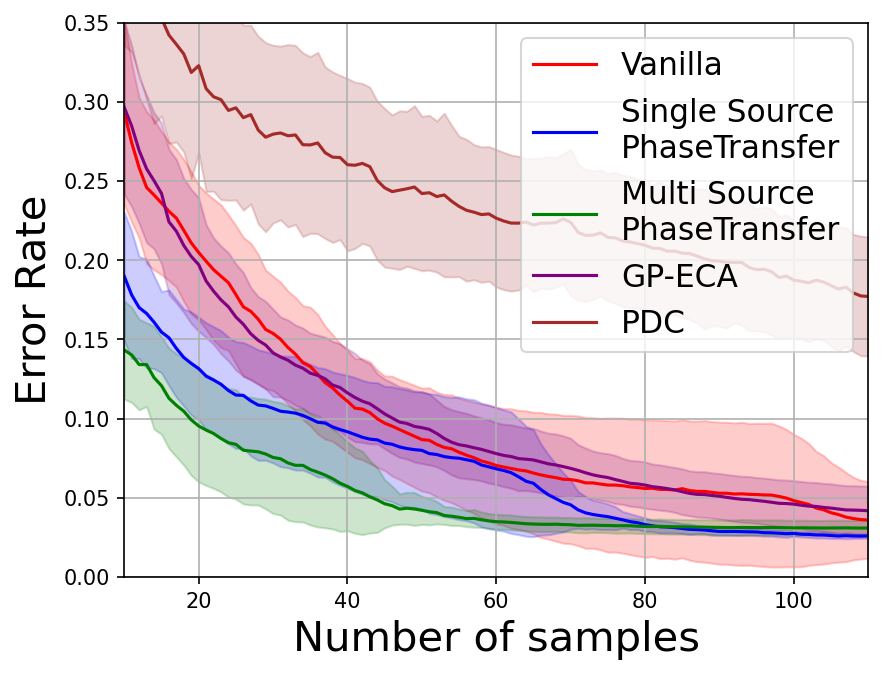

In [5]:
plt.ylim((0,0.35))
error_curve_plotter("sine",n_samples=100, samples_per_it=1)

## Figure 3 3-Component Biological Condensate Benchmark

Vanilla acc: 0.0248121190816164
Vanilla std: 0.0030891767237335443
First under 0.1: 21
Worst under 0.1: 31
First under 0.05: 34
Worst under 0.05: 43
----------------------
Single Source
PhaseTransfer acc: 0.023365654051303864
Single Source
PhaseTransfer std: 0.0018438633996993303
First under 0.1: 16
Worst under 0.1: 26
First under 0.05: 31
Worst under 0.05: 42
----------------------
Multi Source
PhaseTransfer acc: 0.02588283270597458
Multi Source
PhaseTransfer std: 0.003682011505588889
First under 0.1: 13
Worst under 0.1: 32
First under 0.05: 23
Worst under 0.05: 34
----------------------
Zhu acc: 0.04372706658420945
Zhu std: 0.007261846372024049
First under 0.1: 23
Worst under 0.1: 34
First under 0.05: 51
Worst under 0.05: 61
----------------------
PDC acc: 0.10586262626262626
PDC std: 0.017479896012730037
First under 0.1: -1
Worst under 0.1: 61
First under 0.05: -1
Worst under 0.05: 61
----------------------


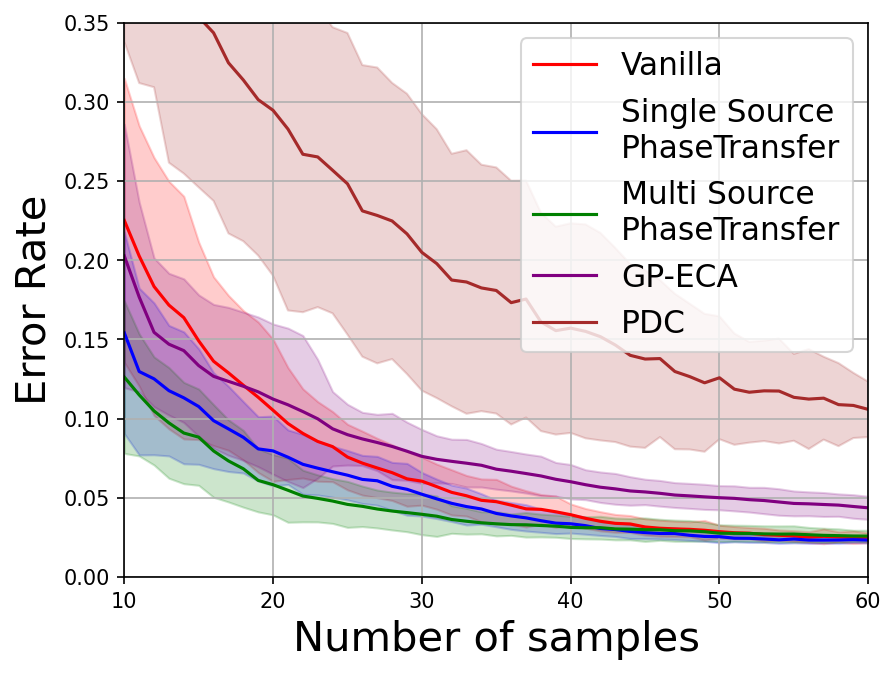

In [6]:
plt.ylim((0,0.35))
error_curve_plotter("biological_condensate",n_samples=50, samples_per_it=1)

## Figure 4 Supramolecular Copolymerization Benchmark

Vanilla acc: 0.021540004760026932
Vanilla std: 0.003548013512045145
First under 0.1: 21
Worst under 0.1: 39
First under 0.05: 35
Worst under 0.05: 42
----------------------
Single Source
PhaseTransfer acc: 0.026514003053307533
Single Source
PhaseTransfer std: 0.005688690580427647
First under 0.1: 14
Worst under 0.1: 28
First under 0.05: 34
Worst under 0.05: 49
----------------------
Multi Source
PhaseTransfer acc: 0.01723399944603443
Multi Source
PhaseTransfer std: 0.002765835030004382
First under 0.1: 7
Worst under 0.1: 39
First under 0.05: 22
Worst under 0.05: 40
----------------------
Zhu acc: 0.035994000000000005
Zhu std: 0.006518908190793916
First under 0.1: 19
Worst under 0.1: 27
First under 0.05: 40
Worst under 0.05: 56
----------------------
PDC acc: 0.162362
PDC std: 0.03955142419686047
First under 0.1: -1
Worst under 0.1: 56
First under 0.05: -1
Worst under 0.05: 56
----------------------


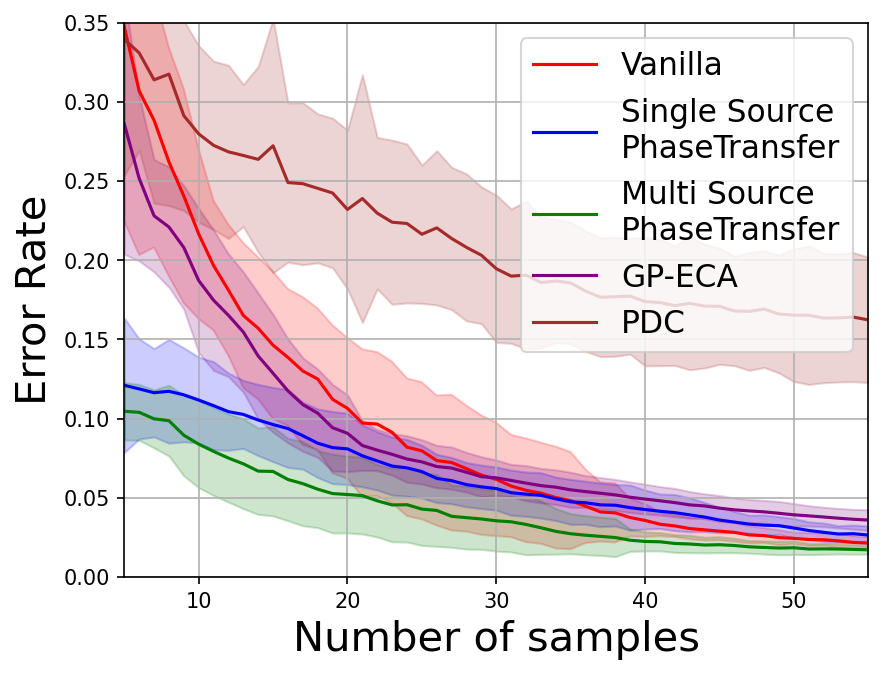

In [7]:
plt.ylim((0,0.35))
error_curve_plotter("supramolecular_copolymerization",n_samples=50, samples_per_it=1, initial_points=5)

# Supplementary Figures

## Figure S1 Hyperparameter sensitivity analysis

In [ ]:
def hyperparameter_error_curve_plotter(m_check, n_samples=100, samples_per_it=1, initial_points = 10, dpi=150):
    n_samples += 1

    acc_threshold = 0.05

    if(m_check):
        with open(f"synthetic_error_rate_data/gp/m_vary.pkl", "rb") as file:
            error_dictionary = pickle.load(file)
    else:
        with open(f"synthetic_error_rate_data/gp/t_vary.pkl", "rb") as file:
            error_dictionary = pickle.load(file)
    if(m_check):
        label = list(error_dictionary.keys())
    else:
        label = list(error_dictionary.keys())[::-1]
    print(label)
    color = ["r", "b", "green", "purple", "brown"]

    for i, name in enumerate(label):
        if(m_check):
            if(name == "m1"):
                legend_label = "No adaptive exponent"
            else:
                legend_label = f"m = {label[i][1:]}"
        else:
            if(name == "t1"):
                legend_label = "No increased exploration"
            else:
                legend_label = fr"$\tau$ = {label[i][1:]}"
        error_data = np.array(error_dictionary[name])
        points = (np.arange(error_data.shape[1])*samples_per_it+ int(initial_points/samples_per_it))

        error_mean = np.mean(error_data, axis = 0)
        error_std = np.std(error_data, axis = 0)
        error_lower = error_mean - error_std
        error_upper = error_mean + error_std

        plt.plot(points[:n_samples], error_mean[:n_samples], label=legend_label, color=color[i])
        plt.fill_between(points[:n_samples], error_lower[:n_samples], error_upper[:n_samples], color=color[i], alpha=0.2)
        plt.legend(fontsize=15)

        first_index = np.argmax(error_mean[:n_samples] < acc_threshold*2) if np.any(error_mean[:n_samples] < acc_threshold*2) else -1
        if(first_index >= 0):
            first_index = first_index*samples_per_it + initial_points
        print(f"{label[i]} acc: {error_mean[:n_samples][-1]}")
        print(f"{label[i]} std: {error_std[:n_samples][-1]}")
        print(f"First under {acc_threshold*2}: {first_index}")
        first_index = np.argmax(error_mean[:n_samples] < acc_threshold) if np.any(error_mean[:n_samples] < acc_threshold) else -1
        if(first_index >= 0):
            first_index = first_index*samples_per_it + initial_points
        print(f"First under {acc_threshold}: {first_index}")
        print("----------------------")


    print("----------------------")

    plt.xlabel("Number of samples", fontsize=20)
    plt.ylabel("Error Rate", fontsize=20)
    plt.xlim((points[:n_samples][0], points[:n_samples][-1]))
    plt.gcf().set_dpi(dpi)
    plt.grid()
    
    
    

### m hyperparameter

['m1', 'm2', 'm3', 'm5', 'm7']
m1 acc: 0.06055000007152558
m1 std: 0.003965564422496683
First under 0.1: 29
First under 0.05: -1
----------------------
m2 acc: 0.04142400003969669
m2 std: 0.003255860083451095
First under 0.1: 22
First under 0.05: 51
----------------------
m3 acc: 0.03471200004220009
m3 std: 0.0037988229161394953
First under 0.1: 20
First under 0.05: 45
----------------------
m5 acc: 0.030110000036656856
m5 std: 0.0032838546651837177
First under 0.1: 21
First under 0.05: 47
----------------------
m7 acc: 0.028771999888122082
m7 std: 0.0035282311857304767
First under 0.1: 20
First under 0.05: 45
----------------------
----------------------


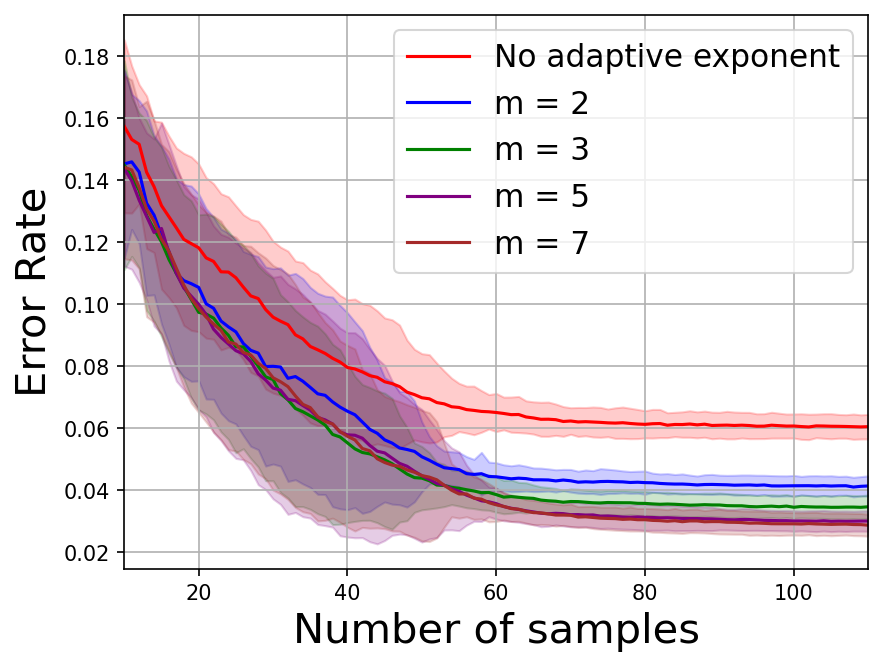

In [15]:
hyperparameter_error_curve_plotter(m_check=True, n_samples=100, samples_per_it=1)

### t hyperparameter

['t1', 't0.8', 't0.7', 't0.6', 't0.5']
t1 acc: 0.0509653064441316
t1 std: 0.04814711997300814
First under 0.1: 22
First under 0.05: -1
----------------------
t0.8 acc: 0.029497959137875205
t0.8 std: 0.004178149705095734
First under 0.1: 19
First under 0.05: 43
----------------------
t0.7 acc: 0.030644898169807026
t0.7 std: 0.004582133133014333
First under 0.1: 19
First under 0.05: 47
----------------------
t0.6 acc: 0.029877551166074618
t0.6 std: 0.0038251193257168538
First under 0.1: 19
First under 0.05: 47
----------------------
t0.5 acc: 0.030332653308097198
t0.5 std: 0.004550774364805854
First under 0.1: 19
First under 0.05: 44
----------------------
----------------------


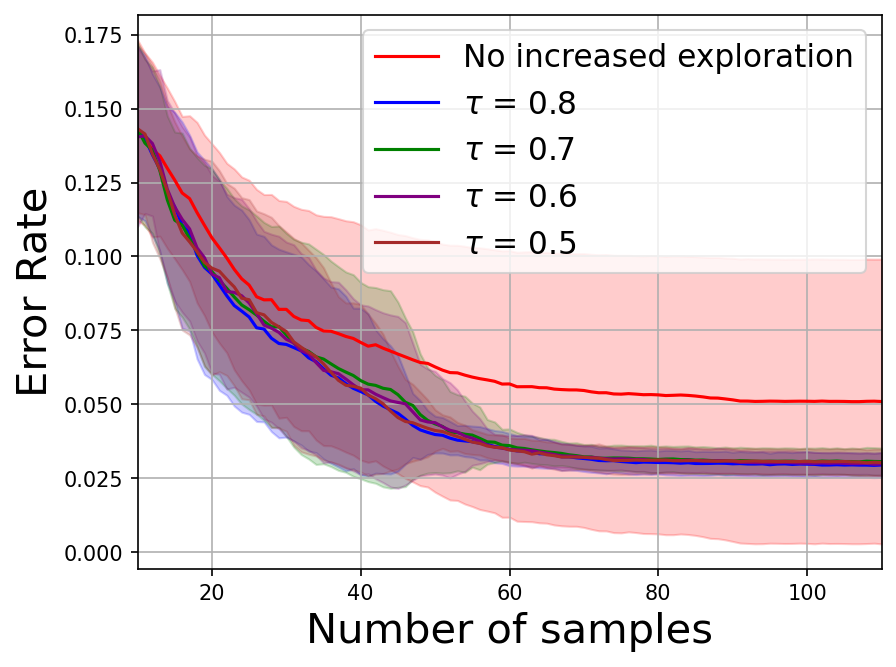

In [16]:
hyperparameter_error_curve_plotter(m_check=False, n_samples=100, samples_per_it=1)

## Figure S2 Noisy Sine Wave Benchmark

Vanilla acc: 0.12595298886299133
Vanilla std: 0.028038503602147102
First under 0.1: -1
Worst under 0.1: 111
First under 0.05: -1
Worst under 0.05: 111
----------------------
Single Source
PhaseTransfer acc: 0.11987800896167755
Single Source
PhaseTransfer std: 0.026002727448940277
First under 0.1: -1
Worst under 0.1: 111
First under 0.05: -1
Worst under 0.05: 111
----------------------
Multi Source
PhaseTransfer acc: 0.11978800594806671
Multi Source
PhaseTransfer std: 0.02686583437025547
First under 0.1: -1
Worst under 0.1: 111
First under 0.05: -1
Worst under 0.05: 111
----------------------
Zhu acc: 0.137772
Zhu std: 0.020889586305142573
First under 0.1: -1
Worst under 0.1: 111
First under 0.05: -1
Worst under 0.05: 111
----------------------
PDC acc: 0.2365780000000001
PDC std: 0.04332605354749034
First under 0.1: -1
Worst under 0.1: 111
First under 0.05: -1
Worst under 0.05: 111
----------------------


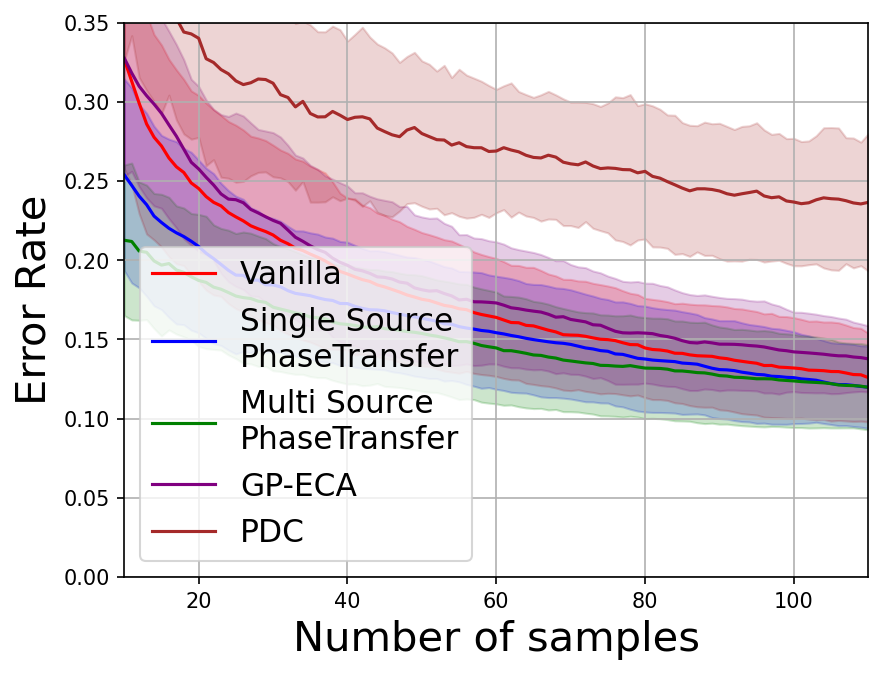

In [8]:
plt.ylim((0,0.35))
error_curve_plotter("noisy_sine",n_samples=100, samples_per_it=1)

## Figure S3 Robustness to irrelevant sources

In [18]:
def robustness_error_curve_plotter(n_samples=100, samples_per_it=1, initial_points = 10, dpi=150):
    n_samples += 1

    acc_threshold = 0.05

    with open(f"synthetic_error_rate_data/gp/unrrelated_supramolecular_copolymerization.pkl", "rb") as file:
        error_dictionary = pickle.load(file)
    label = list(sorted(error_dictionary.keys()))

    color = ["r", "b", "green", "purple", "brown"]

    for i, name in enumerate(sorted(label)):
        n_correlated = label[i][0]
        m_uncorrelated = label[i][2]
        error_data = np.array(error_dictionary[name])
        points = (np.arange(error_data.shape[1])+ int(initial_points/samples_per_it))*samples_per_it

        error_mean = np.mean(error_data, axis = 0)
        error_std = np.std(error_data, axis = 0)
        error_lower = error_mean - error_std
        error_upper = error_mean + error_std
        if(int(name[2])==0):
            alpha = 1
        else:
            alpha = 0.5
        plt.plot(points[:n_samples], error_mean[:n_samples], label=f"n = {n_correlated}, m = {m_uncorrelated}", color=color[int(label[i][0])], alpha = alpha)
        plt.legend(fontsize=15)

        first_index = np.argmax(error_mean[:n_samples] < acc_threshold*2) if np.any(error_mean[:n_samples] < acc_threshold*2) else -1
        if(first_index >= 0):
            first_index = first_index*samples_per_it + initial_points
        print(f"{label[i]} acc: {error_mean[:n_samples][-1]}")
        print(f"{label[i]} std: {error_std[:n_samples][-1]}")
        print(f"First under {acc_threshold*2}: {first_index}")
        first_index = np.argmax(error_mean[:n_samples] < acc_threshold) if np.any(error_mean[:n_samples] < acc_threshold) else -1
        if(first_index >= 0):
            first_index = first_index*samples_per_it + initial_points
        print(f"First under {acc_threshold}: {first_index}")
        print("----------------------")


    print("----------------------")

    plt.xlabel("Number of samples", fontsize=20)
    plt.ylabel("Error Rate", fontsize=20)
    plt.xlim((points[:n_samples][0], points[:n_samples][-1]))
    plt.gcf().set_dpi(dpi)
    plt.grid()
    
    
    

0+0 acc: 0.021540004760026932
0+0 std: 0.003548013512045145
First under 0.1: 21
First under 0.05: 35
----------------------
0+1 acc: 0.019680000841617584
0+1 std: 0.0029194520320743322
First under 0.1: 19
First under 0.05: 33
----------------------
0+2 acc: 0.019916001707315445
0+2 std: 0.002465713769197464
First under 0.1: 20
First under 0.05: 34
----------------------
1+0 acc: 0.026514003053307533
1+0 std: 0.005688690580427647
First under 0.1: 14
First under 0.05: 34
----------------------
1+1 acc: 0.025717997923493385
1+1 std: 0.004522021394222975
First under 0.1: 14
First under 0.05: 36
----------------------
1+2 acc: 0.025374000892043114
1+2 std: 0.005251239985227585
First under 0.1: 13
First under 0.05: 34
----------------------
2+0 acc: 0.01723399944603443
2+0 std: 0.002765835030004382
First under 0.1: 7
First under 0.05: 22
----------------------
2+1 acc: 0.0173179991543293
2+1 std: 0.003650900674983859
First under 0.1: 7
First under 0.05: 20
----------------------
2+2 acc: 0.0

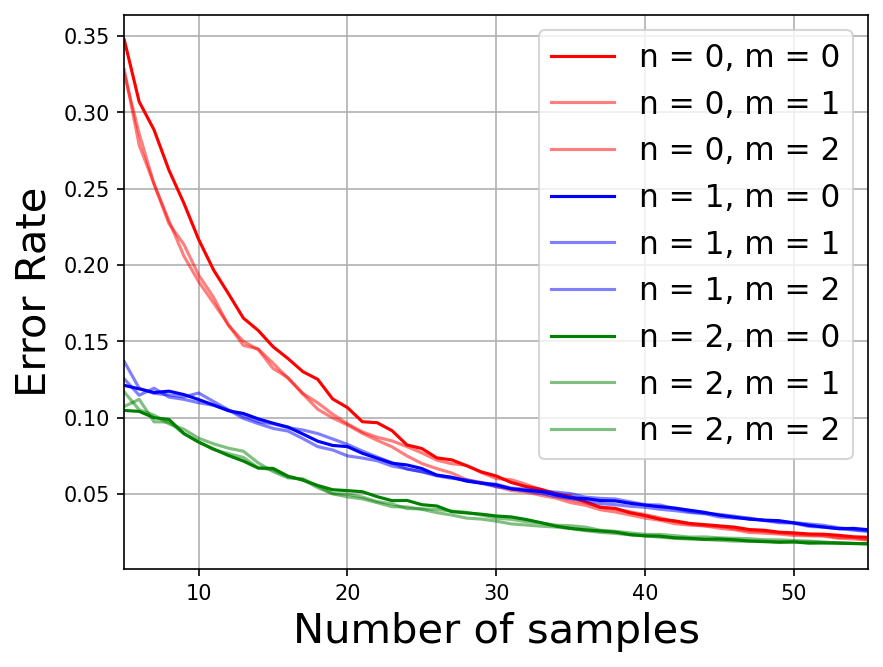

In [19]:
robustness_error_curve_plotter(n_samples=50, samples_per_it=1, initial_points=5)

## Figure S4 individual versus batch sampling

In [20]:
def batch_error_curve_plotter(name, n_samples=100, initial_points = 10, dpi=150):
    n_samples += 1

    acc_threshold = 0.05

    

    with open(f"synthetic_error_rate_data/gp/{name}.pkl", "rb") as file:
        error_dictionary = pickle.load(file)

    single_vanilla = np.array(error_dictionary["vanilla"])
    single_tl = np.array(error_dictionary["tl_linear"])

    with open(f"synthetic_error_rate_data/gp/batch_{name}.pkl", "rb") as file:
        error_dictionary = pickle.load(file)
    
    batch_vanilla = np.array(error_dictionary["vanilla"])
    batch_tl = np.array(error_dictionary["tl_linear"])


    single_points = (np.arange(single_vanilla.shape[1])+ int(initial_points))*1
    batch_points = (np.arange(batch_vanilla.shape[1])*10 + int(initial_points))
    single_vanilla_mean = np.mean(single_vanilla, axis = 0)
    single_tl_mean = np.mean(single_tl, axis = 0)
    batch_vanilla_mean = np.mean(batch_vanilla, axis = 0)
    batch_tl_mean = np.mean(batch_tl, axis = 0)

    plt.plot(single_points[:n_samples], single_vanilla_mean[:n_samples], label=f"Vanilla", color="red", alpha = 1)
    plt.plot(batch_points[:n_samples], batch_vanilla_mean[:n_samples], label=f"Batch Vanilla", color="red", alpha = 0.5)
    
    plt.plot(single_points[:n_samples], single_tl_mean[:n_samples], label=f"Multi Source\nPhaseTransfer", color="green", alpha = 1)
    plt.plot(batch_points[:n_samples], batch_tl_mean[:n_samples], label=f"Batch Multi Source\nPhaseTransfer", color="green", alpha = 0.5)

    plt.legend(fontsize=15)



    print("----------------------")

    plt.xlabel("Number of samples", fontsize=20)
    plt.ylabel("Error Rate", fontsize=20)
    plt.xlim((single_points[:n_samples][0], single_points[:n_samples][-1]))
    plt.gcf().set_dpi(dpi)
    plt.grid()
    
    
    

Sine
----------------------


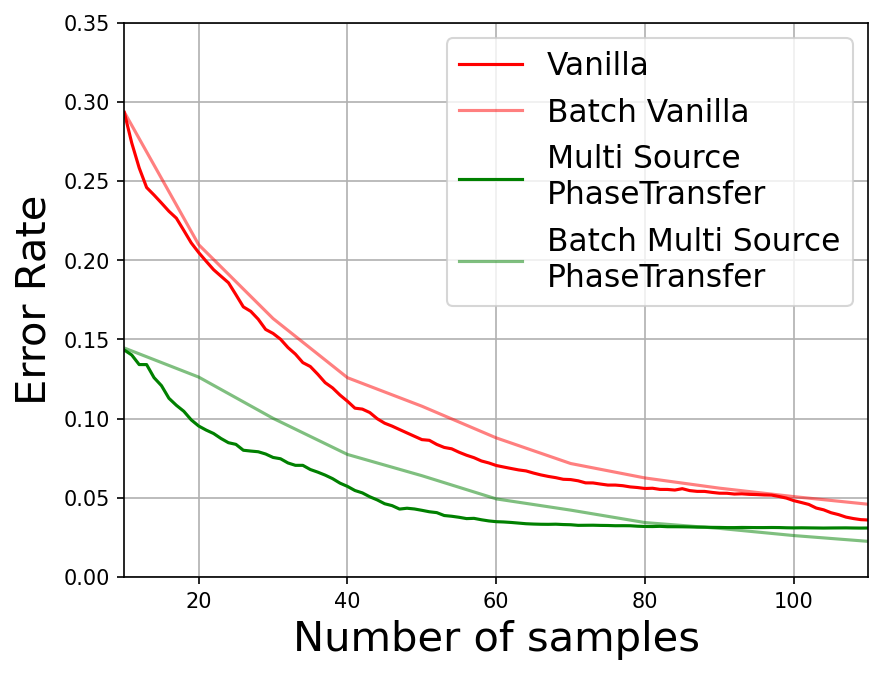

3-Component Biological Condensate
----------------------


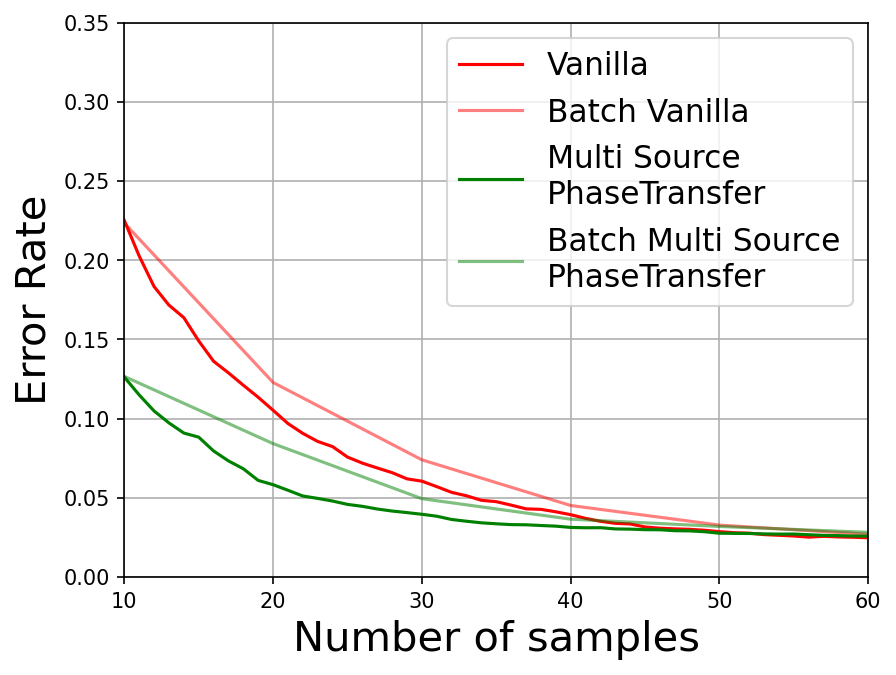

Supramolecular Copolymerization
----------------------


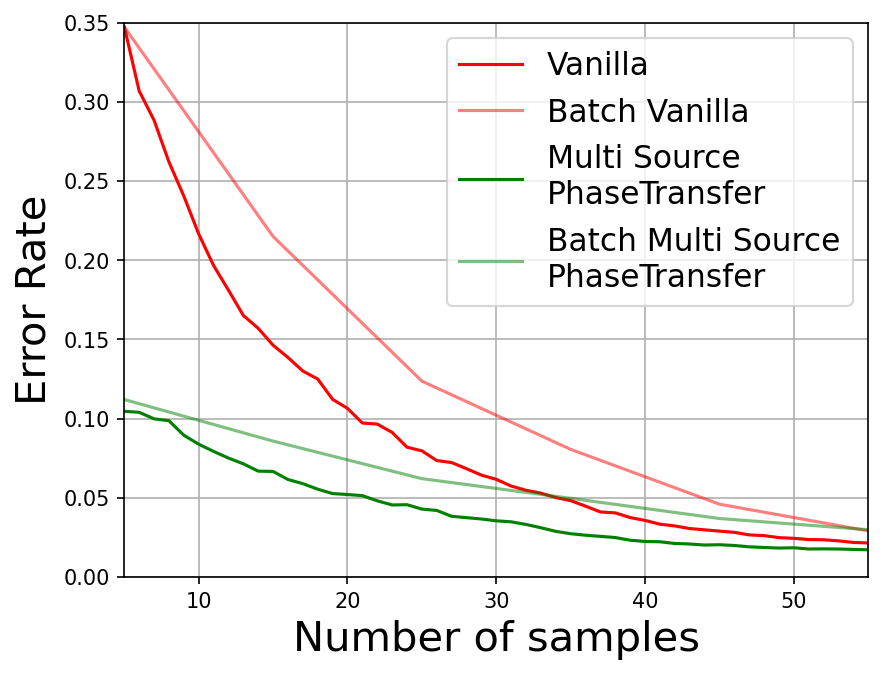

In [24]:
print("Sine")
plt.ylim((0,0.35))
batch_error_curve_plotter("sine", n_samples=100)
plt.show()

print("3-Component Biological Condensate")
plt.ylim((0,0.35))
batch_error_curve_plotter("biological_condensate",n_samples=50)
plt.show()

print("Supramolecular Copolymerization")
plt.ylim((0,0.35))
batch_error_curve_plotter("supramolecular_copolymerization",n_samples=50, initial_points=5)
plt.show()